In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import bootstrap

REPO_ROOT /home/daniel/Projects/meta-lifelong-learning/deep-neuroevolution/multiplai/notebooks/structural_plasticity/../../..


In [3]:
import multiplai.structural_plasticity.clique.clique as c

In [4]:
import mxnet as mx
import numpy as np

import mxnet.ndarray as nd

In [5]:


a = np.array([[1, 23, 4, 1], 
              [5, 0, 3, -1],
              [3, 4, 1, 10]])
np.where(a == a.max(axis=1, keepdims=True), 1, 0)


array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [6]:
a.flatten()


array([ 1, 23,  4,  1,  5,  0,  3, -1,  3,  4,  1, 10])

In [7]:
a.flatten().reshape((3,4))

array([[ 1, 23,  4,  1],
       [ 5,  0,  3, -1],
       [ 3,  4,  1, 10]])

In [8]:
a = nd.array(a)

In [9]:
mask = nd.topk(nd.array(a), ret_typ='mask') #.reshape((-1,))
mask


[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
<NDArray 3x4 @cpu(0)>

In [10]:
a_masked = nd.multiply(nd.array(a), mask)
a_masked


[[ 0. 23.  0.  0.]
 [ 5.  0.  0. -0.]
 [ 0.  0.  0. 10.]]
<NDArray 3x4 @cpu(0)>

In [11]:
nd.where(a > 6, nd.ones_like(a),nd.zeros_like(a))


[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
<NDArray 3x4 @cpu(0)>

In [12]:
x = nd.linspace(-1, 2, 100)

# y = nd.sigmoid(x)


In [13]:
def sigmoid(x):
    
    x = nd.clip(x, 0.0001, .9999)
    return .5 + .5*nd.tanh(nd.tan(np.pi*x - np.pi/2))

In [27]:
y = sigmoid(x)

In [44]:
import multiplai.structural_plasticity.clique.clique as c

In [45]:
y = c.weight_sigmoid_hard(x)

In [46]:
np.pi

3.141592653589793

In [47]:
import matplotlib.pyplot as plt

In [48]:
import seaborn as sns

In [49]:
sns.set_style()

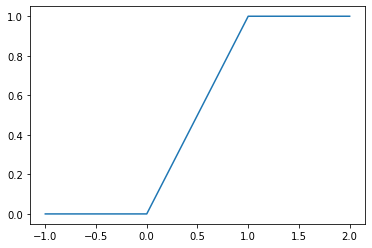

In [50]:
plt.plot(x.asnumpy(),y.asnumpy() )

In [17]:
sigmoid(nd.array([0.0000]))


[0.]
<NDArray 1 @cpu(0)>

In [18]:
sigmoid(nd.array([1]))


[1.]
<NDArray 1 @cpu(0)>

In [19]:
nd.tan(nd.array([-np.pi/2]))


[22877334.]
<NDArray 1 @cpu(0)>

In [20]:
np.tan(-np.pi/2)

-1.633123935319537e+16

In [22]:
nd.outer

AttributeError: module 'mxnet.ndarray' has no attribute 'outer'

In [23]:
x = nd.array([1, 2, 3])
y = nd.array([1, 2, 3])

In [24]:
nd.linalg.gemm2(x, y, transpose_a=True)

MXNetError: [17:11:20] src/imperative/./imperative_utils.h:145: Operator _linalg_gemm2 inferring shapes failed.
input shapes:
[3]
[3]
output shapes:
None
operator attributes:
transpose_a : True

Stack trace:
  [bt] (0) /home/daniel/Projects/meta-lifelong-learning/deep-neuroevolution/ve/lib/python3.6/site-packages/mxnet/libmxnet.so(+0x4a3b8b) [0x7f5b87669b8b]
  [bt] (1) /home/daniel/Projects/meta-lifelong-learning/deep-neuroevolution/ve/lib/python3.6/site-packages/mxnet/libmxnet.so(mxnet::imperative::SetShapeType(mxnet::Context const&, nnvm::NodeAttrs const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&, mxnet::DispatchMode*)+0x39cb) [0x7f5b898bf60b]
  [bt] (2) /home/daniel/Projects/meta-lifelong-learning/deep-neuroevolution/ve/lib/python3.6/site-packages/mxnet/libmxnet.so(mxnet::Imperative::Invoke(mxnet::Context const&, nnvm::NodeAttrs const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&)+0x1db) [0x7f5b898c786b]
  [bt] (3) /home/daniel/Projects/meta-lifelong-learning/deep-neuroevolution/ve/lib/python3.6/site-packages/mxnet/libmxnet.so(+0x25ffd19) [0x7f5b897c5d19]
  [bt] (4) /home/daniel/Projects/meta-lifelong-learning/deep-neuroevolution/ve/lib/python3.6/site-packages/mxnet/libmxnet.so(MXImperativeInvokeEx+0x6f) [0x7f5b897c630f]
  [bt] (5) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call_unix64+0x4c) [0x7f5bee242dae]
  [bt] (6) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call+0x22f) [0x7f5bee24271f]
  [bt] (7) /usr/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(_ctypes_callproc+0x2b4) [0x7f5bee4565c4]
  [bt] (8) /usr/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(+0x11c33) [0x7f5bee456c33]



In [25]:
c.outer(x,y)


[[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]
<NDArray 3x3 @cpu(0)>

In [ ]:
x.shape

In [ ]:
x.expand_dims(0)

In [ ]:
[[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]

In [87]:
cluster_size=4
n_clusters = 5
n_patterns = 3

In [88]:
patterns = nd.random_randint(0, cluster_size, shape=(n_patterns, n_clusters))
patterns


[[1 1 2 0 1]
 [2 2 3 0 1]
 [0 1 1 0 0]]
<NDArray 3x5 @cpu(0)>

In [91]:
nd.concat(*[patterns, patterns], dim=1)


[[1 1 2 0 1 1 1 2 0 1]
 [2 2 3 0 1 2 2 3 0 1]
 [0 1 1 0 0 0 1 1 0 0]]
<NDArray 3x10 @cpu(0)>

In [68]:
nd.one_hot(patterns, cluster_size).reshape(patterns.shape[0],-1)


[[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]]
<NDArray 3x20 @cpu(0)>

In [69]:
from multiplai.structural_plasticity.clique import eval as e

In [75]:
patterns = e.generate_random_patterns(2, 3, 100).asnumpy()

In [81]:
patterns

array([[1, 0],
       [1, 2],
       [0, 0],
       [1, 0],
       [1, 2],
       [2, 1],
       [1, 1],
       [2, 2],
       [1, 0],
       [2, 2],
       [1, 1],
       [2, 0],
       [2, 0],
       [2, 1],
       [1, 0],
       [0, 2],
       [2, 1],
       [0, 2],
       [1, 1],
       [0, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [2, 2],
       [0, 2],
       [0, 1],
       [1, 2],
       [2, 1],
       [1, 0],
       [2, 2],
       [2, 2],
       [1, 2],
       [2, 1],
       [0, 0],
       [2, 0],
       [0, 1],
       [2, 2],
       [0, 1],
       [0, 2],
       [2, 2],
       [2, 1],
       [1, 0],
       [1, 1],
       [2, 0],
       [0, 1],
       [0, 2],
       [0, 0],
       [2, 0],
       [1, 0],
       [2, 1],
       [2, 1],
       [2, 0],
       [2, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 2],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 2],
       [1, 2],
       [0, 2],
       [2, 1],
       [0, 2],
       [0,

In [84]:
np.unique(patterns, axis=0)

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 0],
       [1, 1],
       [1, 2],
       [2, 0],
       [2, 1],
       [2, 2]], dtype=int32)